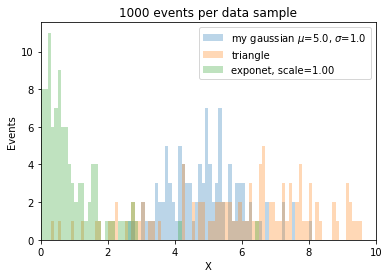

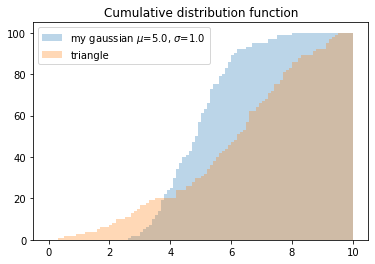

In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

def myRandNormal(mean,sigma,nevents):
   xlimit=5.0  # generate random number up to 5 sigma.
   xtemp = np.zeros(nevents)
   for i in np.arange(nevents):
      j=0
      while j < 1000000:
         r=np.random.uniform(0.0,1.0,2)  # generate two uniform random number
         x=(r[0]-0.5)*xlimit;
         y=np.exp(-x*x)
         if(y>r[1]):
            xtemp[i]=x
            break
         j=j+1
   return mean+xtemp*sigma*np.sqrt(2.0)

def myfunction(x,a,b,c):
   y=0.0
   if(x > a and x < c):
      y=(x-a)/(c-a)
   if(x > c and x < b):
      y=1.0-(x-c)/(b-c)
   return y

def myRandTriangle(a,b,c,nevents):
   xtemp = np.zeros(nevents)
   for i in np.arange(nevents):
      j=0
      while j <  1000000:
         r=np.random.uniform(a,b,2)  # generate two uniform random number
         x=a+r[0]*(b-a)
         y=myfunction(x,a,b,c)
         if(y > r[1]):
            xtemp[i]=x
            break
         j=j+1
   return xtemp

# dataA = np.random.normal(5, 1.0, 1000)
dataA = myRandNormal(5, 1.0, 100)    # using my own Gaussian generator
# dataB = np.random.uniform(0.00, 10.0, 1000)
dataB = myRandTriangle(0.0,10.0,8.0, 100)  # using my triangle generator
dataC = np.random.exponential(1.0,100)


xmin=-0.0
xmax=10.0
dx=0.1

fig1=plt.figure(1)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=np.arange(xmin,xmax+dx,dx))

plt.hist(dataA, label='my gaussian $\mu$=5.0, $\sigma$=1.0', **kwargs)
plt.hist(dataB, label='triangle', **kwargs)
plt.hist(dataC, label='exponet, scale=1.00', **kwargs);

plt.xlim(xmin,xmax)
plt.xlabel('X')
plt.ylabel('Events')
plt.title('1000 events per data sample')

plt.legend(loc='upper right')
# plt.show()

fig2=plt.figure(2)
plt.hist(dataA, label='my gaussian $\mu$=5.0, $\sigma$=1.0',cumulative=True,  **kwargs)
plt.hist(dataB, label='triangle',cumulative=True, **kwargs)
plt.title('Cumulative distribution function')
plt.legend(loc='upper left')

fig1.savefig('fig_hist1D_mygausA')
fig2.savefig('fig_hist1D_mygausB')
plt.show()